In [1]:
from dynamita.sumo import *
import numpy
import time
import matplotlib.pyplot as plt
import pandas as pd

In [2]:
%matplotlib notebook

In [ ]:
sumo = Sumo(sumoPath="C:/Users/zerualem/AppData/Local/Dynamita/Sumo16", licenseFile=r"networklicense.sumolic")

In [4]:
def datacomm_callback(sumo):
    t.append(sumo.core.csumo_var_get_time_double(sumo.handle))
    #snhx.append(sumo.core.csumo_var_get_pvtarray_pos(sumo.handle, snhx_pos, 0))
    for i in range(6):
        snhx[i].append(sumo.core.csumo_var_get_pvtarray_pos(sumo.handle, snhx_pos, i))
    return 0

In [5]:
sumo.unload_model()
sumo.load_model('myGSBR.sumo')

No model is loaded


0

In [6]:
sumo.register_datacomm_callback(datacomm_callback)

In [33]:
snhx_pos = sumo.core.csumo_model_get_variable_info_pos(sumo.handle, b'Sumo__Plant__GranularSBR__SO2')
sumo.core.csumo_command_send(sumo.handle, b'execute script_Initialize.scs;')
snhx_pos

99

In [34]:
%%time 
stop_t=6*3600*1000
dataComm = 180000
sumo.set_stopTime(stop_t)
sumo.set_dataComm(dataComm)
t = []
snhx=[[] for i in range(6)]

sumo.run_model()

while not sumo.simulation_finished:
        time.sleep(0.01)

Wall time: 11.8 s


In [35]:
print(len(t))
stop_t/dataComm

121


120.0

In [36]:
titles=["Bulk", "Layer 1", "Layer 2", "Layer 3", "Layer 4", "Layer 5"]
data_dict = dict(zip(titles,snhx))
dframe = pd.DataFrame(data_dict, index=t)

In [37]:
dframe.head(20)

,Bulk,Layer 1,Layer 2,Layer 3,Layer 4,Layer 5
0.000000,0.000887,7.757786e-08,1.797977e-12,4.316291e-17,1.198319e-21,5.540539e-26
0.002083,6.822849,1.141895e-02,3.120473e-05,2.350933e-07,2.047629e-09,2.195035e-11
0.004167,5.509186,6.315339e-03,1.605245e-05,1.298864e-07,1.275027e-09,1.302553e-11
0.006250,4.169656,3.830473e-03,9.955029e-06,7.649339e-08,3.529540e-10,2.877191e-12
0.008333,3.002632,1.796030e-03,1.780193e-06,5.282132e-09,2.237117e-11,1.737347e-13
0.010417,2.081023,1.067546e-03,1.021054e-06,2.926537e-09,1.225308e-11,9.422503e-14
0.012500,1.431741,6.966257e-04,6.548259e-07,1.839565e-09,7.659505e-12,5.858375e-14
0.014583,0.931885,4.367726e-04,4.042494e-07,1.117980e-09,4.643403e-12,3.542645e-14
0.016667,0.604716,2.768735e-04,2.527978e-07,6.904360e-10,2.864196e-12,2.182550e-14
0.018750,0.393945,1.777474e-04,1.602738e-07,4.332275e-10,1.795939e-12,1.367603e-14


<IPython.core.display.Javascript object>


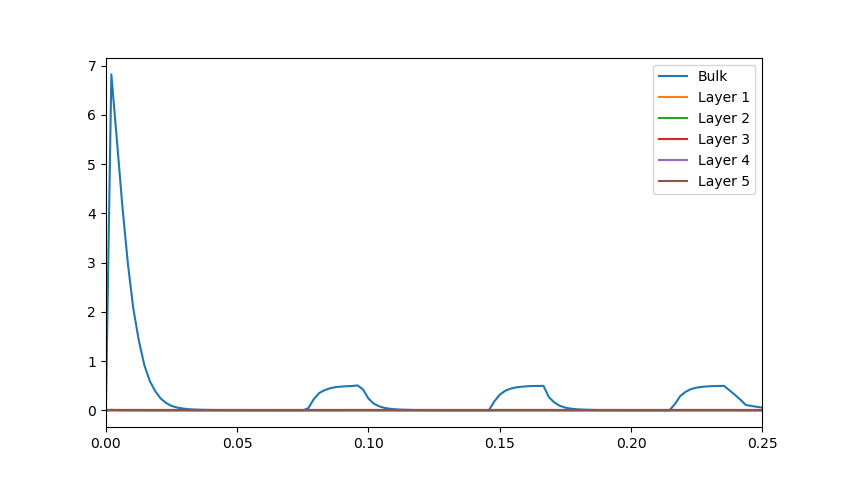

In [38]:
dframe.plot()

In [ ]:
fig,ax = plt.subplots(1,1)
ax.set_xlabel('time')
ax.set_ylabel('SNHx')
titles=("Bulk", "Layer 1", "Layer 2", "Layer 3", "Layer 4", "Layer 5")
for i in range(6):
    ax.plot(t, snhx[i], label=titles[i])
    ax.plot(t, snhx[i])
    fig.canvas.draw()
    plt.legend(loc='upper right', title='Legend')
